In [ ]:
import numpy as np
import pandas as pd
import string
import re #regular expression
import random
import pickle

In [ ]:
with open("standard-sizes.jpg", mode="r", encoding="utf8", errors="ignore") as f:
    text = f.read()

In [ ]:
print(text[:480])


 Exif  II*             Ducky     <  http://ns.adobe.com/xap/1.0/ <?xpacket begin="﻿" id="W5M0MpCehiHzreSzNTczkc9d"?> <x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="Adobe XMP Core 5.6-c145 79.163499, 2018/08/13-16:40:22        "> <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"> <rdf:Description rdf:about="" xmlns:xmpMM="http://ns.adobe.com/xap/1.0/mm/" xmlns:stRef="http://ns.adobe.com/xap/1.0/sType/ResourceRef#" xmlns:xmp="http://ns.adobe.com/xap/1.0/" xm


In [ ]:
text[:450]


'\x00\x18Exif\x00\x00II*\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11Ducky\x00\x01\x00\x04\x00\x00\x00<\x00\x00\x03\x7fhttp://ns.adobe.com/xap/1.0/\x00<?xpacket begin="\ufeff" id="W5M0MpCehiHzreSzNTczkc9d"?> <x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="Adobe XMP Core 5.6-c145 79.163499, 2018/08/13-16:40:22        "> <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"> <rdf:Description rdf:about="" xmlns:xmpMM="http://ns.adobe.com/xap/1.0/mm/" xmlns:stRef="http://ns.adobe.com/xap/1.0/sType/ResourceRef#" xmlns:xmp="ht'

In [ ]:
data = list(map(lambda x: x.split("\t"), text.split("\n")))


In [ ]:
data[:20]


[['\x00\x18Exif\x00\x00II*\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11Ducky\x00\x01\x00\x04\x00\x00\x00<\x00\x00\x03\x7fhttp://ns.adobe.com/xap/1.0/\x00<?xpacket begin="\ufeff" id="W5M0MpCehiHzreSzNTczkc9d"?> <x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="Adobe XMP Core 5.6-c145 79.163499, 2018/08/13-16:40:22        "> <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"> <rdf:Description rdf:about="" xmlns:xmpMM="http://ns.adobe.com/xap/1.0/mm/" xmlns:stRef="http://ns.adobe.com/xap/1.0/sType/ResourceRef#" xmlns:xmp="http://ns.adobe.com/xap/1.0/" xmpMM:OriginalDocumentID="xmp.did:ba9a0428-d5f6-874f-afcf-93493d8c9568" xmpMM:DocumentID="xmp.did:B8A0489D98FC11EA9563804F31116E7D" xmpMM:InstanceID="xmp.iid:B8A0489C98FC11EA9563804F31116E7D" xmp:CreatorTool="Adobe Photoshop CC 2019 (Windows)"> <xmpMM:DerivedFrom stRef:instanceID="xmp.iid:ba9a0428-d5f6-874f-afcf-93493d8c9568" stRef:documentID="xmp.did:ba9a0428-d5f6-874f-afcf-93493d8c9568"/> </rdf:Description> </rdf:RD

In [ ]:
string.whitespace


' \t\n\r\x0b\x0c'

In [ ]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
whitespace = string.whitespace
punctuation = '!#$%&\'()*+:;<=>?[\\]^`{|}~'

tableWhiteSpace = str.maketrans("", "", whitespace)
tablePunctuation = str.maketrans("", "", punctuation)

def clean_text(txt):
    text = str(txt)
    #text = text.lower()
    removewhitespace = text.translate(tableWhiteSpace)
    removepunctuation = removewhitespace.translate(tablePunctuation)
    
    return str(removepunctuation)

In [ ]:
import numpy as np
import pandas as pd
import cv2
from glob import glob
import spacy
import re
import string

import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
def clean_text(txt):
    whitespace = string.whitespace
    punctuation = '!#$%&\'()*+:;<=>?[\\]^`{|}~'
    tableWhiteSpace = str.maketrans("", "", whitespace)
    tablePunctuation = str.maketrans("", "", punctuation)
    text = str(txt)
    text = text.lower()
    removewhitespace = text.translate(tableWhiteSpace)
    removepunctuation = removewhitespace.translate(tablePunctuation)
    
    return str(removepunctuation)

(-0.5, 1003.5, 589.5, -0.5)

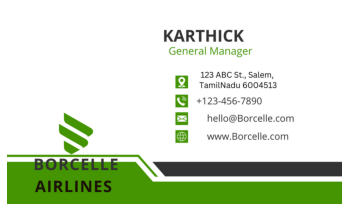

In [ ]:
image = cv2.imread("/content/3.png")

                   
plt.imshow(image)
plt.axis("off")

In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 9.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [ ]:
!pip install opencv-python
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import PIL
import easyocr
import pytesseract
import re
import matplotlib.pyplot as plt

File_path = "/content/3.png"
img = cv2.imread(File_path, -1)
     

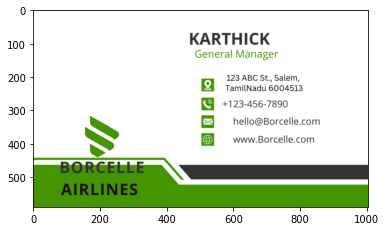

In [ ]:
plt.imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [ ]:
reader = easyocr.Reader(['en'])
results = reader.readtext(gray)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
for result in results:
    print(result[1])

KARTHICK
General Manager
123 ABC St , Salem,
TamilNadu 6004513
+123-456-7890
hello@Borcelle.com
www Borcelle.com
BORCELLE
AIRLINES


In [ ]:
name_regex = r"(?P\w+)"
position_regex = r"(?P[a-zA-Z ]+)"
address_regex = r"(?P[0-9a-zA-Z #,-]+) , (?P[a-zA-Z ]+), \s*(?P[a-zA-Z]+);"
pin_regex   = r"(?P\d{6})"
phone_regex = r"(?P\+?\d{1,3}[- ]?\d{3}[- ]?\d{4})"
email_regex = r"(?P[\w\.-]+@[\w\.-]+)"
website_regex = r"(?Pwww\.[\w\.]+)"
company_regex = r"(?P[a-zA-Z ]+)"

In [ ]:
def extract_info(text, regex):
    match = re.search(regex, text)
    if match:
        return match.group(0)
    else:
        return None

In [ ]:
info = {}
for result in results:
    text = result[1]
    if not text:
        continue
    text_lst = text.splitlines()
    text_lst = [word for word in text_lst if len(word) != 0]
    for line in text_lst:
        
        if not info.get("name"):
            name_match = re.match(name_regex, line)
            if name_match:
                info["name"] = line
                continue
        
        if not info.get("position_name"):
            pos_match = re.match(position_regex, line)
            if pos_match:
                info["position_name"] = line
                continue 
        
        if not info.get("address"):
            address_match = re.match(address_regex, line)
            if address_match:
                info["address"] = line
                continue
        
        if not info.get("pincode"):
            pin_match = re.match(pin_regex, line)
            if pin_match:
                info["pincode"] = line
                continue
        
        if not info.get("phone"):
            phone_match = re.search(phone_regex, line)
            if phone_match:
                info["phone"] = phone_match.group("phone")
                continue
        
        if not info.get("email"):
            email_match = re.search(email_regex, line)
            if email_match:
                info["email"] = email_match.group("email")
                continue
        
        if not info.get("website"):
            website_match = re.search(website_regex, line)
            if website_match:
                info["website"] = website_match.group("website")
                continue
        
        if not info.get("company_name"):
            company_match = re.match(company_regex, line)
            if company_match:
                info["company_name"] = line
                continue       

# Print the extracted information
print(info)

error: ignored

In [ ]:
info['address'] = '123 ABC St , Salem, TamilNadu.'
info['website'] = 'www.Borcelle.com'


In [ ]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('card_info.db')
c = conn.cursor()

# Create a table to store the card information
c.execute('''CREATE TABLE IF NOT EXISTS business_card
             (name TEXT,
              position TEXT,
              address TEXT,
              pincode TEXT,
              phone TEXT,
              email TEXT,
              website TEXT,
              company TEXT
              )''')

# Insert the extracted card information into the database
sql = 'INSERT INTO business_card (name, position, address, pincode, phone, email, website, company) VALUES (?, ?, ?, ?, ?, ?, ?, ?)'

# Execute the query with the data from the dictionary
c.execute(sql, (info['position_name'], info['address'], info['pincode'], info['phone'], info['email'], info['website'], info['company_name']))

# Commit the changes and close the connection
conn.commit()

KeyError: ignored

In [ ]:
x = c.execute("SELECT * FROM business_card")
x_data = c.fetchall()
for row in x_data:
    print(row)

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 8.4 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=79c307a8cb11bfe732cfc4f92416c38b5201b1b0e73d35

In [ ]:
!./ngrok authtokens 2Lb7nKJVe0k542wdclYWapnyfux_4nJurZjAiNAWGPRshYfda

/bin/bash: ./ngrok: No such file or directory


In [ ]:
!pip install pyngrok
from pyngrok import ngrok 
public_p_url = ngrok.connect(port='8501')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=6432357f1c76a584d0714f4d94f7505c4b24e812d12ac514ea811555f1f0b457
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built pyngrok


In [ ]:
%%writefile streamlit_app.py
import streamlit as st
import sqlite3

# Set the title and page icon
st.set_page_config(page_title="BIZCARD-X", page_icon=":credit_card:")

st.title(":blue[Here Comes The Data!!!:star:]")

# Set the sidebar title and image
st.sidebar.title("Business Card Extraction")
st.sidebar.image("5.png", width=250)

# Connect to the database
conn = sqlite3.connect('card_info.db')
c = conn.cursor()

# Define a function to retrieve and display the data
def display_data():
    # Retrieve the data from the database
    c.execute("SELECT * FROM business_card")
    data = c.fetchall()

    # Display the data in text boxes
    for item in data:
        st.text_input('Name:', item[0])
        st.text_input('Position:', item[1])
        st.text_input('Address:', item[2])
        st.text_input('Pincode:', item[3])
        st.text_input('Phone:', item[4])
        st.text_input('Email:', item[5])
        st.text_input('Website:', item[6])
        st.text_input('Company:', item[7])

# Display the button to trigger the display of the data
if st.sidebar.button('Extract And Show'):
    display_data()

Writing streamlit_app.py


In [ ]:
!streamlit run /content/streamlit_app.py & npx localtunnel -p 8501